# 1. Data Preparation

In [1]:
# prompt: connect drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
pd.set_option('display.max_colwidth', 1000)

In [4]:
df_train = pd.read_csv("/content/drive/MyDrive/ML_DM/final_news_train.csv")

In [5]:
df_test = pd.read_csv("/content/drive/MyDrive/ML_DM/final_news_test.csv")

In [6]:
df_train.head(20)

,label,text
0,2,"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again."
1,2,"Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market."
2,2,Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.
3,2,"Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday."
4,2,"Oil prices soar to all-time record, posing new menace to US economy (AFP) AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections."
5,2,"Stocks End Up, But Near Year Lows (Reuters) Reuters - Stocks ended slightly higher on Friday\but stayed near lows for the year as oil prices surged past #36;46\a barrel, offsetting a positive outlook from computer maker\Dell Inc. (DELL.O)"
6,2,"Money Funds Fell in Latest Week (AP) AP - Assets of the nation's retail money market mutual funds fell by #36;1.17 billion in the latest week to #36;849.98 trillion, the Investment Company Institute said Thursday."
7,2,"Fed minutes show dissent over inflation (USATODAY.com) USATODAY.com - Retail sales bounced back a bit in July, and new claims for jobless benefits fell last week, the government said Thursday, indicating the economy is improving from a midsummer slump."
8,2,"Safety Net (Forbes.com) Forbes.com - After earning a PH.D. in Sociology, Danny Bazil Riley started to work as the general manager at a commercial real estate firm at an annual base salary of #36;70,000. Soon after, a financial planner stopped by his desk to drop off brochures about insurance benefits available through his employer. But, at 32, ""buying insurance was the furthest thing from my mind,"" says Riley."
9,2,"Wall St. Bears Claw Back Into the Black NEW YORK (Reuters) - Short-sellers, Wall Street's dwindling band of ultra-cynics, are seeing green again."


In [7]:
df_test.head(20)

,label,text
0,2,Fears for T N pension after talks Unions representing workers at Turner Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.
1,3,"The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com) SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket."
2,3,"Ky. Company Wins Grant to Study Peptides (AP) AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins."
3,3,"Prediction Unit Helps Forecast Wildfires (AP) AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar."
4,3,"Calif. Aims to Limit Farm-Related Smog (AP) AP - Southern California's smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation's first rules to reduce air pollution from dairy cow manure."
5,3,"Open Letter Against British Copyright Indoctrination in Schools The British Department for Education and Skills (DfES) recently launched a ""Music Manifesto"" campaign, with the ostensible intention of educating the next generation of British musicians. Unfortunately, they also teamed up with the music industry (EMI, and various artists) to make this popular. EMI has apparently negotiated their end well, so that children in our schools will now be indoctrinated about the illegality of downloading music.The ignorance and audacity of this got to me a little, so I wrote an open letter to the DfES about it. Unfortunately, it's pedantic, as I suppose you have to be when writing to goverment representatives. But I hope you find it useful, and perhaps feel inspired to do something similar, if or when the same thing has happened in your area."
6,3,"Loosing the War on Terrorism \\""Sven Jaschan, self-confessed author of the Netsky and Sasser viruses, is\responsible for 70 percent of virus infections in 2004, according to a six-month\virus roundup published Wednesday by antivirus company Sophos.""\\""The 18-year-old Jaschan was taken into custody in Germany in May by police who\said he had admitted programming both the Netsky and Sasser worms, something\experts at Microsoft confirmed. (A Microsoft antivirus reward program led to the\teenager's arrest.) During the five months preceding Jaschan's capture, there\were at least 25 variants of Netsky and one of the port-scanning network worm\Sasser.""\\""Graham Cluley, senior technology consultant at Sophos, said it was staggeri ...\\"
7,3,"FOAFKey: FOAF, PGP, Key Distribution, and Bloom Filters \\FOAF/LOAF and bloom filters have a lot of interesting properties for social\network and whitelist distribution.\\I think we can go one level higher though and include GPG/OpenPGP key\fingerpring distribution in the FOAF file for simple web-of-trust based key\distribution.\\What if we used FOAF and included the PGP key fingerprint(s) for identities?\This could mean a lot. You include the PGP key fingerprints within the FOAF\file of your direct friends and then include a bloom filter of the PGP key\fingerprints of your entire whitelist (the source FOAF file would of course need\to be encrypted ).\\Your whitelist would be populated from the social network as your client\discovered new identit ...\\"
8,3,"E-mail scam targets police chief Wiltshire Police warns about ""phishing"" after its fraud squad chief was targeted."
9,3,"Card fraud unit nets 36,000 cards In its first two years, the UK's dedicated card fraud unit, has recovered 36,000 stolen cards and 171 arrests - and estimates it saved 65m."


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227963 entries, 0 to 227962
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   227963 non-null  int64 
 1   text    227963 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.5+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19596 entries, 0 to 19595
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   19596 non-null  int64 
 1   text    19596 non-null  object
dtypes: int64(1), object(1)
memory usage: 306.3+ KB


In [10]:
df_train.isnull().sum()

,0
label,0
text,0


In [11]:
df_test.isnull().sum()

,0
label,0
text,0


# EDA

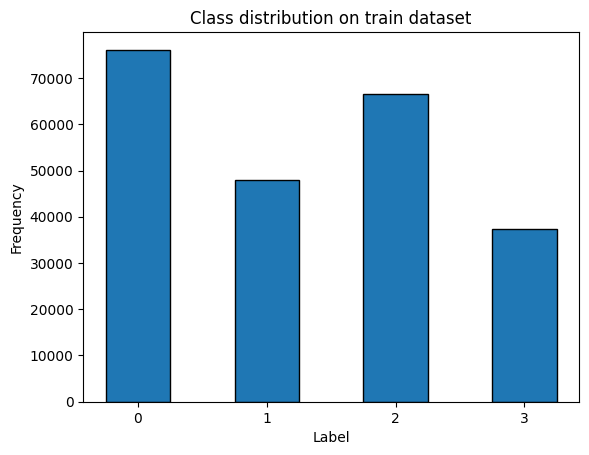

In [12]:
label_counts = df_train['label'].value_counts().sort_index()

# Trục x và y
x = label_counts.index
y = label_counts.values

# Vẽ biểu đồ cột với cột tách nhau (width < 1)
plt.title('Class distribution on train dataset')
plt.bar(x, y, width=0.5, edgecolor='black')  # width < 1 giúp cột không dính nhau
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(x)  # Đảm bảo nhãn trục x đúng và nằm giữa
plt.show()

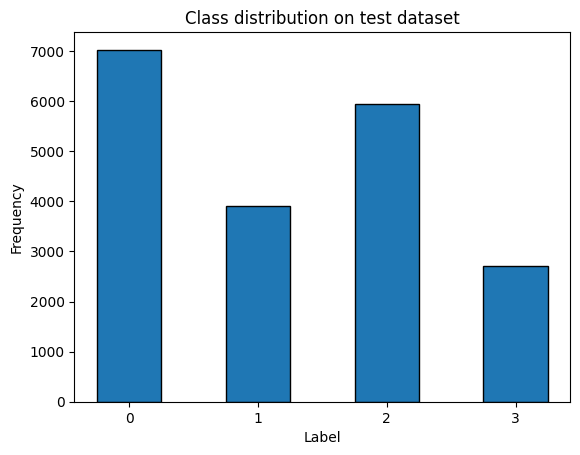

In [13]:
label_counts = df_test['label'].value_counts().sort_index()

# Trục x và y
x = label_counts.index
y = label_counts.values

# Vẽ biểu đồ cột với cột tách nhau (width < 1)
plt.title('Class distribution on test dataset')
plt.bar(x, y, width=0.5, edgecolor='black')  # width < 1 giúp cột không dính nhau
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(x)  # Đảm bảo nhãn trục x đúng và nằm giữa
plt.show()

In [14]:
import re

def contains_html(text):
  """Checks if a string contains HTML tags."""
  match = re.search('<.*?>', text)
  return bool(match)

html_rows = df_train[df_train['text'].apply(contains_html)]

html_rows.head()

,label,text


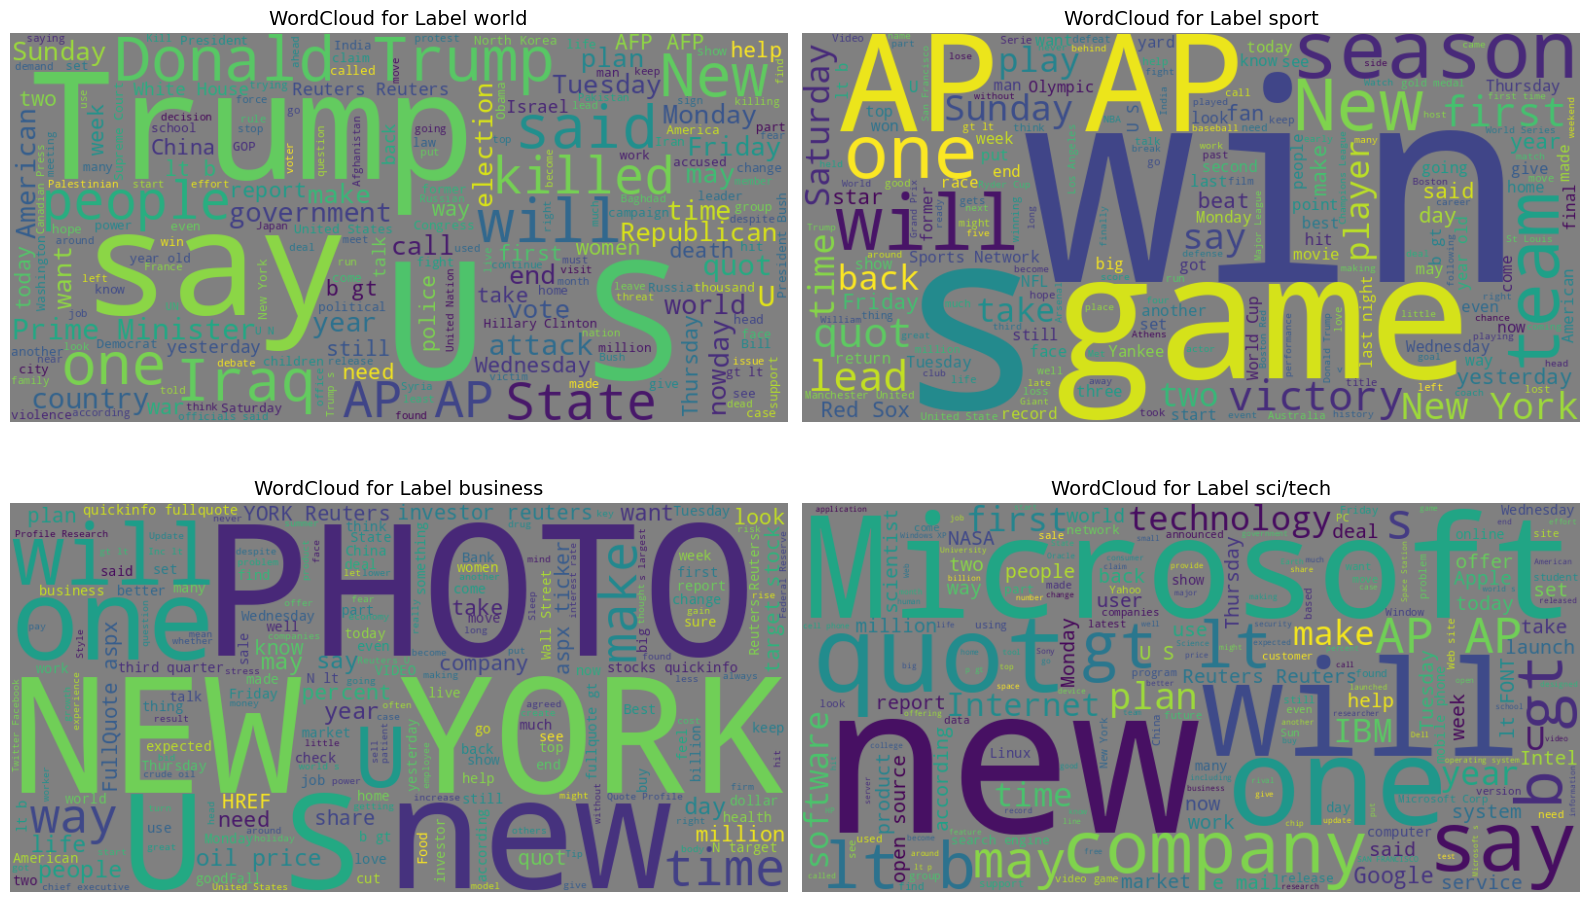

In [15]:
from wordcloud import WordCloud

label_map = {
    0: 'world',
    1: 'sport',
    2: 'business',
    3: 'sci/tech'
}

labels = df_train['label'].unique()
labels.sort()

plt.figure(figsize=(16, 10))

for i, label in enumerate(labels):
    text = ' '.join(df_train[df_train['label'] == label]['text'].dropna().astype(str))

    wordcloud = WordCloud(width=800, height=400, background_color='gray').generate(text)

    plt.subplot(2, 2, i+1)  # 2 hàng, 2 cột cho 4 nhãn
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for Label {label_map[label]}', fontsize=14)

plt.tight_layout()
plt.show()

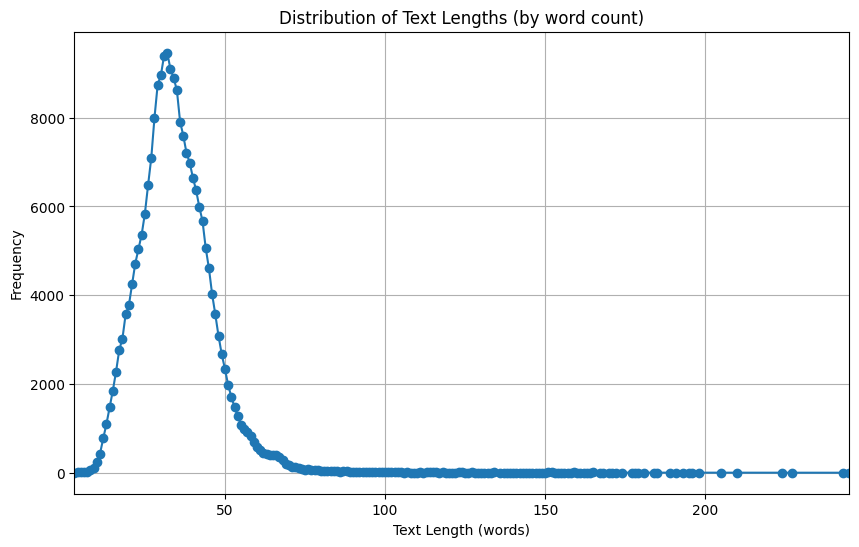

In [16]:
# Tính độ dài mỗi văn bản theo số từ
df_train['text_length'] = df_train['text'].dropna().apply(lambda x: len(str(x).split()))

# Đếm tần suất xuất hiện mỗi độ dài
length_counts = df_train['text_length'].value_counts().sort_index()
min_len = df_train['text_length'].min()
max_len = df_train['text_length'].max()
df_train = df_train.drop(columns=['text_length'])

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(length_counts.index, length_counts.values, marker='o')
plt.xlabel('Text Length (words)')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths (by word count)')
plt.xlim(min_len, max_len)
plt.grid(True)
plt.show()

In [17]:
print(min_len)
print(max_len)

3
245


# Spliting train, validation, test

In [18]:
import torch
from torch.nn.utils.rnn import pad_sequence
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer
from sklearn.ensemble import RandomForestClassifier
from torch.optim import AdamW


In [19]:
train_size = int(0.9 * len(df_train))

df_train_copy = df_train.copy()
df_train = df_train_copy.iloc[:train_size]
df_val = df_train_copy.iloc[train_size:]

print(df_train.shape)
print(df_val.shape)

(205166, 2)
(22797, 2)


In [20]:
df_train_1 = df_train.copy()
df_val_1 = df_val.copy()
df_test_1 = df_test.copy()

# 4. ML models

**Preprocessing Data**


1. Lowercase
2. Remove Punctuations
3. Remove Numbers (consideration)
4. Remove Stopwords
5. Tokenize
6. Lemmatize/Stem



In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower() # Lowercase
    text = re.sub(r'[^a-z\s]', '', text) # Remove puctuations and digits
    tokens = nltk.word_tokenize(text) # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1] # Lemmatize and remove stopwords

    # Merge into string
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [22]:
mask_train = df_train['text'].notnull()
df_train.loc[mask_train, 'clean_text'] = df_train.loc[mask_train, 'text'].apply(preprocess_text)

mask_val = df_val['text'].notnull()
df_val.loc[mask_val, 'clean_text'] = df_val.loc[mask_val, 'text'].apply(preprocess_text)

mask_test = df_test['text'].notnull()
df_test.loc[mask_test, 'clean_text'] = df_test.loc[mask_test, 'text'].apply(preprocess_text)

<ipython-input-22-ac5a5bf780d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[mask_train, 'clean_text'] = df_train.loc[mask_train, 'text'].apply(preprocess_text)
<ipython-input-22-ac5a5bf780d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.loc[mask_val, 'clean_text'] = df_val.loc[mask_val, 'text'].apply(preprocess_text)


In [23]:
print(df_train.head())

   label  \
0      2   
1      2   
2      2   
3      2   
4      2   

                                                                                                                                                                                                                                                                         text  \
0                                                                                                                            Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.   
1  Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.   
2                                    Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude

**Vectorize with TFIDF**

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)

In [25]:
train_tfidf_text = df_train['clean_text'].values
train_tfidf_label = df_train['label'].values
test_tfidf_text = df_test['clean_text'].values
test_tfidf_label = df_test['label'].values
val_tfidf_text = df_val['clean_text'].values
val_tfidf_label = df_val['label'].values

In [26]:
# Fit Vectorizer to train dataset and apply on valid & test dataset
X_tfidf_train = vectorizer.fit_transform(df_train['clean_text'])
X_tfidf_val = vectorizer.transform(df_val['clean_text'])
X_tfidf_test = vectorizer.transform(df_test['clean_text'])

In [27]:
print(X_tfidf_train.shape)
print(X_tfidf_val.shape)
print(X_tfidf_test.shape)

(205166, 1000)
(22797, 1000)
(19596, 1000)


In [28]:
X_tfidf_train = X_tfidf_train.toarray()
X_tfidf_val = X_tfidf_val.toarray()
X_tfidf_test = X_tfidf_test.toarray()

In [29]:
print(vectorizer.get_feature_names_out())

['able' 'access' 'according' 'accused' 'across' 'act' 'action' 'actually'
 'ad' 'add' 'administration' 'afghan' 'afghanistan' 'afp' 'africa'
 'african' 'age' 'agency' 'ago' 'agreed' 'agreement' 'ahead' 'aid' 'air'
 'airline' 'al' 'allow' 'almost' 'already' 'also' 'always' 'america'
 'american' 'amid' 'among' 'amp' 'analyst' 'angeles' 'announced' 'annual'
 'another' 'ap' 'appeal' 'apple' 'application' 'arafat' 'area' 'arm'
 'army' 'around' 'arrested' 'art' 'ask' 'asked' 'association' 'athens'
 'attack' 'attempt' 'attorney' 'august' 'australia' 'australian'
 'authority' 'award' 'away' 'back' 'bad' 'baghdad' 'ban' 'bank'
 'bankruptcy' 'barrel' 'baseball' 'based' 'battle' 'beat' 'beauty'
 'become' 'began' 'begin' 'behind' 'believe' 'benefit' 'best' 'better'
 'bid' 'big' 'biggest' 'bill' 'billion' 'black' 'blair' 'blast' 'blue'
 'board' 'body' 'bomb' 'bombing' 'book' 'boost' 'border' 'boston' 'bowl'
 'break' 'bring' 'britain' 'british' 'brown' 'build' 'building' 'bush'
 'business' 'buy' 'ca

**Models**

In [30]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
lr = SGDClassifier(loss = "log_loss", max_iter=1, warm_start = True, learning_rate="constant", eta0=0.01, random_state=42)

best_accuracy = 0
no_improvement_count = 0
early_stopping_threshold = 3
epochs = 20

In [34]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    lr.fit(X_tfidf_train, train_tfidf_label)

    train_preds = lr.predict(X_tfidf_train)
    val_preds = lr.predict(X_tfidf_val)

    train_probs = lr.predict_proba(X_tfidf_train)
    val_probs = lr.predict_proba(X_tfidf_val)

    train_loss = log_loss(train_tfidf_label, train_probs)
    val_loss = log_loss(val_tfidf_label, val_probs)

    train_accuracy = np.mean(train_preds == train_tfidf_label)
    val_accuracy = np.mean(val_preds == val_tfidf_label)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f} | Train Acc: {train_accuracy:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_accuracy:.4f}")

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    if no_improvement_count >= early_stopping_threshold:
        print("Early stopping triggered.")
        break

Epoch 1/20 - Train Loss: 0.7727 | Train Acc: 0.7655 | Val Loss: 0.8835 | Val Acc: 0.7069
Epoch 2/20 - Train Loss: 0.7030 | Train Acc: 0.7774 | Val Loss: 0.8323 | Val Acc: 0.7142
Epoch 3/20 - Train Loss: 0.6785 | Train Acc: 0.7821 | Val Loss: 0.8136 | Val Acc: 0.7168
Epoch 4/20 - Train Loss: 0.6672 | Train Acc: 0.7844 | Val Loss: 0.8047 | Val Acc: 0.7195
Epoch 5/20 - Train Loss: 0.6613 | Train Acc: 0.7858 | Val Loss: 0.7999 | Val Acc: 0.7201
Epoch 6/20 - Train Loss: 0.6580 | Train Acc: 0.7865 | Val Loss: 0.7971 | Val Acc: 0.7206
Epoch 7/20 - Train Loss: 0.6560 | Train Acc: 0.7870 | Val Loss: 0.7954 | Val Acc: 0.7217
Epoch 8/20 - Train Loss: 0.6549 | Train Acc: 0.7873 | Val Loss: 0.7944 | Val Acc: 0.7221
Epoch 9/20 - Train Loss: 0.6541 | Train Acc: 0.7875 | Val Loss: 0.7937 | Val Acc: 0.7223
Epoch 10/20 - Train Loss: 0.6536 | Train Acc: 0.7876 | Val Loss: 0.7933 | Val Acc: 0.7228
Epoch 11/20 - Train Loss: 0.6533 | Train Acc: 0.7876 | Val Loss: 0.7930 | Val Acc: 0.7229
Epoch 12/20 - Train

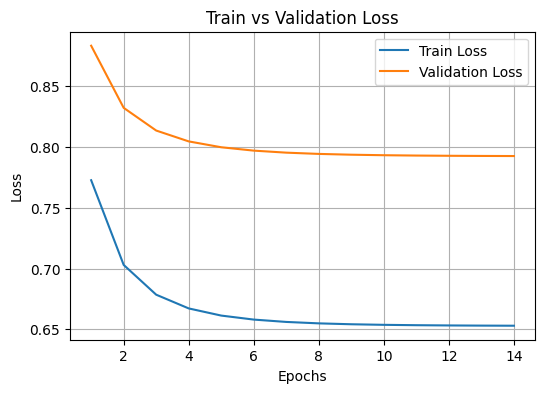

In [35]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.grid()
plt.show()

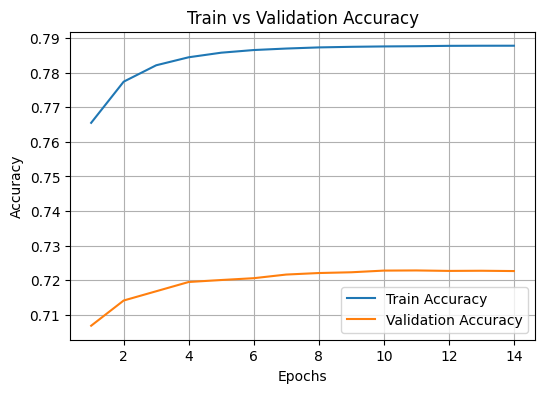

In [36]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Train Accuracy")
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

In [37]:
y_pred_lr = lr.predict(X_tfidf_test)
accuracy = accuracy_score(test_tfidf_label, y_pred_lr)
print(f"Acc: {accuracy:.4f}")

Acc: 0.7622


In [38]:
print(classification_report(test_tfidf_label, y_pred_lr))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      7026
           1       0.80      0.71      0.75      3905
           2       0.72      0.81      0.76      5952
           3       0.75      0.55      0.63      2713

    accuracy                           0.76     19596
   macro avg       0.76      0.73      0.74     19596
weighted avg       0.76      0.76      0.76     19596



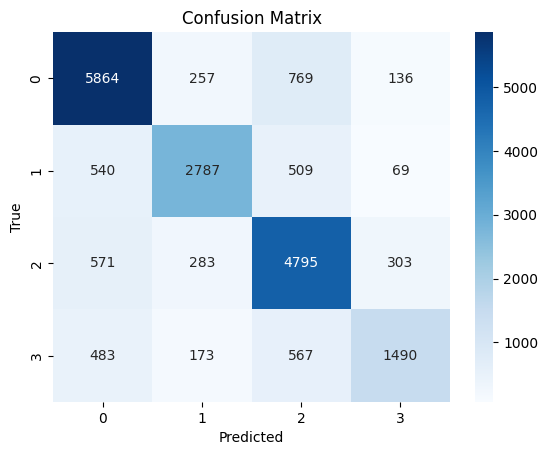

In [39]:
conf_matrix = confusion_matrix(test_tfidf_label, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(4), yticklabels=range(4))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [40]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_tfidf_train, train_tfidf_label)

RandomForestClassifier(random_state=42)

In [41]:
rfc_preds_test = rfc.predict(X_tfidf_test)

test_acc = np.mean(rfc_preds_test == test_tfidf_label)

print(f"RF - Acc: {test_acc:.4f}")

RF - Acc: 0.7746


In [42]:
print(classification_report(test_tfidf_label, rfc_preds_test))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      7026
           1       0.76      0.77      0.77      3905
           2       0.75      0.80      0.78      5952
           3       0.73      0.62      0.67      2713

    accuracy                           0.77     19596
   macro avg       0.77      0.75      0.76     19596
weighted avg       0.77      0.77      0.77     19596



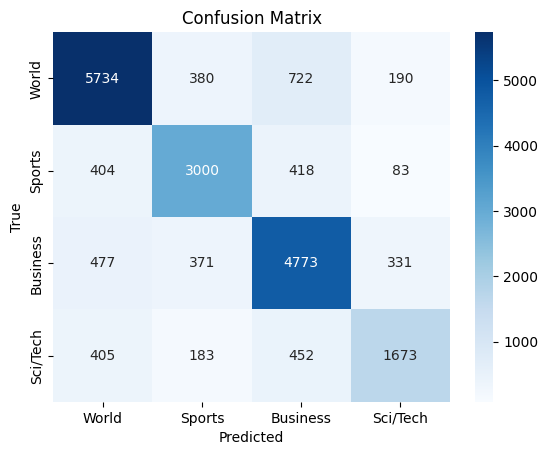

In [43]:
conf_matrix = confusion_matrix(test_tfidf_label, rfc_preds_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'], yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [44]:
xgb = XGBClassifier(n_estimator = 1000, max_depth = 6, learning_rate = 0.1, eval_metric='mlogloss', random_state=42)

In [45]:
eval_set = [(X_tfidf_train, train_tfidf_label), (X_tfidf_val, val_tfidf_label)]
xgb.fit(X_tfidf_train, train_tfidf_label, eval_set=eval_set, verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimator=1000,
              n_estimators=None, n_jobs=None, num_parallel_tree=None, ...)

In [46]:
results = xgb.evals_result()
train_loss = results['validation_0']['mlogloss']
val_loss = results['validation_1']['mlogloss']

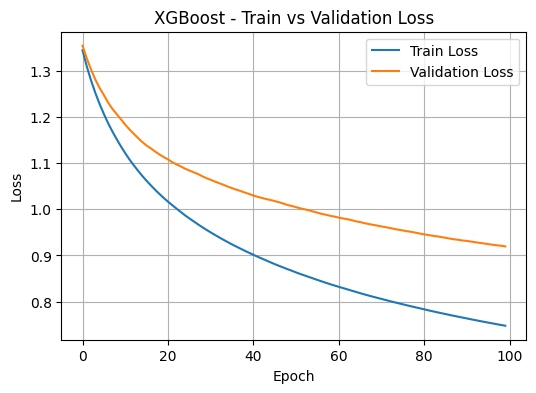

In [47]:
plt.figure(figsize=(6, 4))
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("XGBoost - Train vs Validation Loss")
plt.legend()
plt.grid()
plt.show()

In [48]:
y_pred_xgb = xgb.predict(X_tfidf_test)
accuracy = accuracy_score(test_tfidf_label, y_pred_xgb)
print(f"Acc: {accuracy:.4f}")

Acc: 0.7212


In [49]:
print(classification_report(test_tfidf_label, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      7026
           1       0.82      0.60      0.69      3905
           2       0.61      0.83      0.71      5952
           3       0.75      0.53      0.62      2713

    accuracy                           0.72     19596
   macro avg       0.75      0.68      0.70     19596
weighted avg       0.74      0.72      0.72     19596



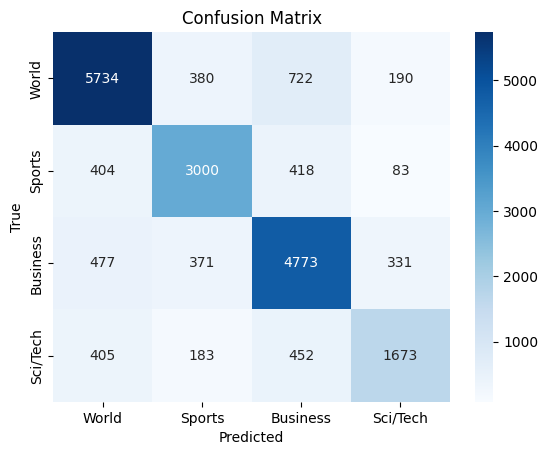

In [50]:
conf_matrix = confusion_matrix(test_tfidf_label, rfc_preds_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'], yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# DL models

**Preprocessing Data: Tokenize with pretrained tokenizer**

In [51]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [52]:
train_encode = [torch.tensor(tokenizer.encode(text, truncation=True, max_length=64)) for text in df_train_1['text']]
val_encode = [torch.tensor(tokenizer.encode(text, truncation=True, max_length=64)) for text in df_val_1['text']]
test_encode = [torch.tensor(tokenizer.encode(text, truncation=True, max_length=64)) for text in df_test_1['text']]

In [53]:
text_lengths = [len(tensor) for tensor in train_encode]

print("Max length:", max(text_lengths))
print("Min length:", min(text_lengths))
print("Average length:", sum(text_lengths) / len(text_lengths))

Max length: 64
Min length: 6
Average length: 46.28737217667645


In [54]:
x_train = pad_sequence(train_encode, batch_first=True, padding_value=tokenizer.pad_token_id)
x_val = pad_sequence(val_encode, batch_first=True, padding_value=tokenizer.pad_token_id)
x_test = pad_sequence(test_encode, batch_first=True, padding_value=tokenizer.pad_token_id)

In [55]:
train_label = df_train_1['label'].tolist()
val_label = df_val_1['label'].tolist()
test_label = df_test_1['label'].tolist()

In [56]:
y_train = torch.tensor(train_label, dtype=torch.long)
y_val = torch.tensor(val_label, dtype=torch.long)
y_test = torch.tensor(test_label, dtype=torch.long)

**Models**

LSTM

In [57]:
class TextDataset(Dataset):
    def __init__(self, inputs, labels):
        self.inputs = inputs
        self.labels = labels

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.labels[idx]

In [58]:
batch_size = 32

In [59]:
train_dataset = TextDataset(x_train, y_train)
val_dataset = TextDataset(x_val, y_val)
test_dataset = TextDataset(x_test, y_test)

In [60]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [61]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, embd_dim, hidden_dim, output_dim, num_layers = 1):
        super(LSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embd_dim, padding_idx=tokenizer.pad_token_id)
        self.lstm = nn.LSTM(embd_dim, hidden_dim, num_layers, batch_first=True)
        self.dropout = nn.Dropout(0.25)
        self.dense = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        last_hidden = self.dropout(lstm_out[:, -1,  :])
        output = self.dense(last_hidden)
        return output

In [62]:
vocab_size = tokenizer.vocab_size
embd_dim = 64
hidden_dim = 256
output_dim = 4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [79]:
lstm = LSTM(vocab_size, embd_dim, hidden_dim, output_dim).to(device)

optimizer = torch.optim.Adam(lstm.parameters(), lr = 3e-5, weight_decay=1e-5)

criterion = torch.nn.CrossEntropyLoss().to(device)

In [80]:
def evaluate(model, data_loader, criterion, device):
    model.eval()
    predictions = []
    targets = []
    total_loss = 0
    with torch.no_grad():
        for batch in data_loader:
            texts, labels = batch
            texts, labels = texts.to(device), labels.to(device)

            outputs = model(texts)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            predictions.append(outputs.argmax(dim=1))
            targets.append(labels)

    predictions = torch.cat(predictions)
    targets = torch.cat(targets)
    accuracy = (predictions == targets).float().mean().item()
    avg_loss = total_loss / len(data_loader)

    return avg_loss, accuracy

In [81]:
num_epochs = 20
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

patience = 5
best_val_accuracy = 0
no_improvement_count = 0

for epoch in range(num_epochs):
    lstm.train()
    total_loss = 0
    for texts, labels in train_loader:
        texts, labels = texts.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = lstm(texts)
        loss = criterion(outputs, labels)
        loss.backward()
        # for name, param in lstm.named_parameters():
        #     if param.grad is not None:
        #         print(f"{name} gradient: {param.grad.norm().item()}")
        optimizer.step()

    train_loss, train_accuracy = evaluate(lstm, train_loader, criterion, device)
    val_loss, val_accuracy = evaluate(lstm, val_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f} | Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        no_improvement_count = 0
    else:
        no_improvement_count += 1
        if no_improvement_count >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}.")
            break


Epoch 1/20 - Train Loss: 1.0763, Train Acc: 0.5196 | Val Loss: 1.0355, Val Acc: 0.6249
Epoch 2/20 - Train Loss: 0.9521, Train Acc: 0.5951 | Val Loss: 0.9713, Val Acc: 0.6186
Epoch 3/20 - Train Loss: 0.8986, Train Acc: 0.6123 | Val Loss: 0.9610, Val Acc: 0.6160
Epoch 4/20 - Train Loss: 0.8461, Train Acc: 0.6387 | Val Loss: 0.9175, Val Acc: 0.6457
Epoch 5/20 - Train Loss: 0.7890, Train Acc: 0.6592 | Val Loss: 0.8849, Val Acc: 0.6673
Epoch 6/20 - Train Loss: 0.7199, Train Acc: 0.7123 | Val Loss: 0.8234, Val Acc: 0.7003
Epoch 7/20 - Train Loss: 0.6359, Train Acc: 0.7605 | Val Loss: 0.7826, Val Acc: 0.7192
Epoch 8/20 - Train Loss: 0.5894, Train Acc: 0.7853 | Val Loss: 0.7587, Val Acc: 0.7267
Epoch 9/20 - Train Loss: 0.5794, Train Acc: 0.7886 | Val Loss: 0.7530, Val Acc: 0.7307
Epoch 10/20 - Train Loss: 0.5149, Train Acc: 0.8190 | Val Loss: 0.6989, Val Acc: 0.7505
Epoch 11/20 - Train Loss: 0.4944, Train Acc: 0.8263 | Val Loss: 0.6858, Val Acc: 0.7553
Epoch 12/20 - Train Loss: 0.4740, Train A

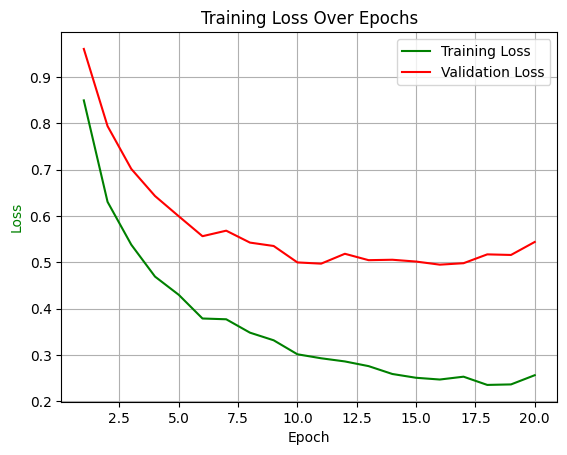

In [66]:
fig, ax1 = plt.subplots()
epochs_completed = len(train_losses)
ax1.plot(range(1, epochs_completed+1), train_losses, 'g-', label='Training Loss')
ax1.plot(range(1, epochs_completed+1), val_losses, 'r-', label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='g')
plt.title('Training Loss Over Epochs')
ax1.legend()
plt.grid()
plt.show()

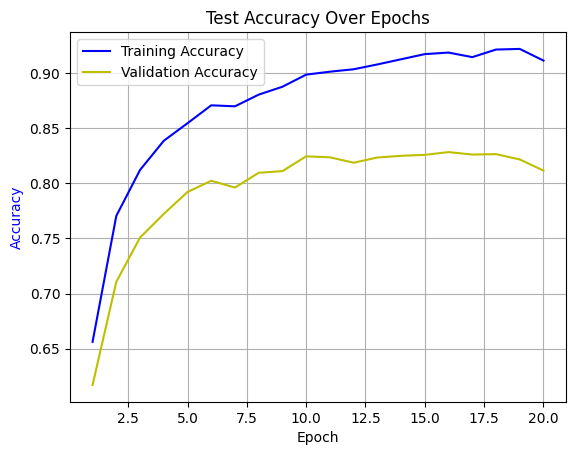

In [67]:
fig, ax1 = plt.subplots()
epochs_completed = len(train_losses)
ax1.plot(range(1, epochs_completed+1), train_accuracies, 'b-', label='Training Accuracy')
ax1.plot(range(1, epochs_completed+1), val_accuracies, 'y-', label='Validation Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color='b')
plt.title('Test Accuracy Over Epochs')
ax1.legend()
ax1.grid()
plt.show()

In [68]:
def evaluate_model(model, test_loader, device=device):
    model.eval()
    model.to(device)

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)

            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)

    return accuracy, all_labels, all_preds


In [69]:
def print_test_results(model, test_loader):

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    accuracy, y_true, y_pred = evaluate_model(model, test_loader, device)

    print(f"Accuracy: {accuracy:.4f}")

    print("\nClassification report:")
    print(classification_report(y_true, y_pred))

    print("\nConfusion matrix:")
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'], yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

Accuracy: 0.8511

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7026
           1       0.80      0.93      0.86      3905
           2       0.90      0.81      0.85      5952
           3       0.80      0.75      0.77      2713

    accuracy                           0.85     19596
   macro avg       0.84      0.84      0.84     19596
weighted avg       0.85      0.85      0.85     19596


Confusion matrix:


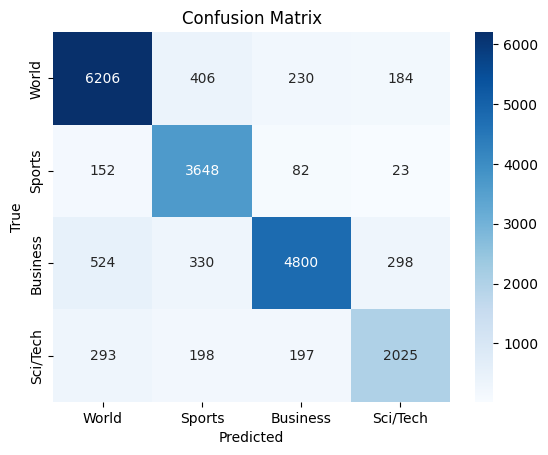

In [70]:
print_test_results(lstm, test_loader)

Transformer

In [71]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # Shape: (1, max_len, d_model)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x: (batch_size, seq_len, d_model)
        pe = self.pe[:, :x.size(1), :].to(device=x.device).detach()
        x = x + pe
        return x

In [72]:
class TransformerClassification(nn.Module):
    def __init__(self, vocab_size, embd_dim, nhead, num_encoder_layers, num_classes, max_len = 64, dropout = 0.25):
        super(TransformerClassification, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embd_dim, padding_idx=tokenizer.pad_token_id)
        self.pos_encoder = PositionalEncoding(embd_dim, max_len)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model = embd_dim,
            nhead = nhead,
            dim_feedforward = embd_dim * 4,
            dropout = dropout,
            batch_first = True,
        )

        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers = num_encoder_layers)
        self.dropout = nn.Dropout(dropout)
        self.dense = nn.Linear(embd_dim, num_classes)
        self.d_model = embd_dim

        self._init_weights()

    def _init_weights(self):
        nn.init.xavier_uniform_(self.embedding.weight)
        nn.init.xavier_uniform_(self.dense.weight)
        nn.init.zeros_(self.dense.bias)

    def forward(self, x):
        x = self.embedding(x) * math.sqrt(self.d_model)
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)
        x = self.dropout(x)
        x = self.dense(x)
        return x

In [73]:
def create_model(vocab_size, embd_dim = 64, nhead = 4, num_encoder_layers = 2, num_classes = 4, max_len = 64, dropout = 0.25):
    model = TransformerClassification(vocab_size, embd_dim, nhead, num_encoder_layers, num_classes, max_len, dropout)
    return model

In [74]:
transformer = create_model(vocab_size, embd_dim, nhead = 4, num_encoder_layers = 2, num_classes = 4, max_len = 64, dropout = 0.25).to(device)
optimizer = torch.optim.AdamW(transformer.parameters(), lr = 1e-3, weight_decay=1e-4)
criterion = torch.nn.CrossEntropyLoss().to(device)

In [75]:
num_epochs = 20
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

patience = 5
best_val_accuracy = 0
no_improvement_count = 0

for epoch in range(num_epochs):
    transformer.train()
    total_loss = 0
    for texts, labels in train_loader:
        texts, labels = texts.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = transformer(texts)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    train_loss, train_accuracy = evaluate(transformer, train_loader, criterion, device)
    val_loss, val_accuracy = evaluate(transformer, val_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f} | Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        no_improvement_count = 0
    else:
        no_improvement_count += 1
        if no_improvement_count >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}.")
            break

Epoch 1/20 - Train Loss: 0.2778, Train Acc: 0.9047 | Val Loss: 0.4786, Val Acc: 0.8292
Epoch 2/20 - Train Loss: 0.2362, Train Acc: 0.9172 | Val Loss: 0.5389, Val Acc: 0.8126
Epoch 3/20 - Train Loss: 0.1721, Train Acc: 0.9419 | Val Loss: 0.5057, Val Acc: 0.8286
Epoch 4/20 - Train Loss: 0.1416, Train Acc: 0.9526 | Val Loss: 0.5835, Val Acc: 0.8212
Epoch 5/20 - Train Loss: 0.1193, Train Acc: 0.9597 | Val Loss: 0.6648, Val Acc: 0.8117
Epoch 6/20 - Train Loss: 0.0963, Train Acc: 0.9668 | Val Loss: 0.7234, Val Acc: 0.8123
Early stopping triggered at epoch 6.


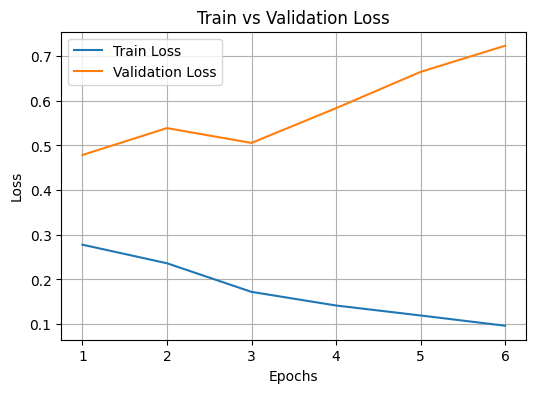

In [76]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.grid()
plt.show()

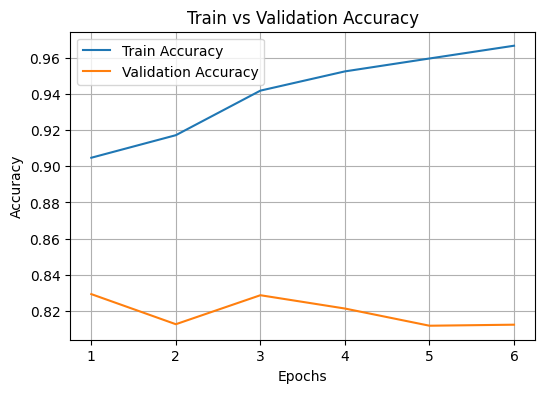

In [77]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Train Accuracy")
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

Accuracy: 0.8531

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      7026
           1       0.87      0.89      0.88      3905
           2       0.87      0.84      0.85      5952
           3       0.74      0.78      0.76      2713

    accuracy                           0.85     19596
   macro avg       0.84      0.85      0.84     19596
weighted avg       0.85      0.85      0.85     19596


Confusion matrix:


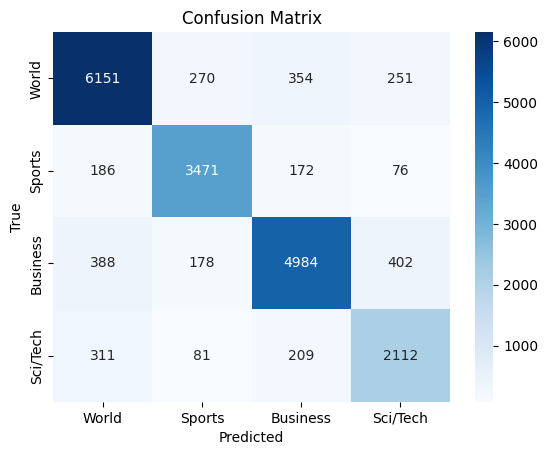

In [78]:
print_test_results(transformer, test_loader)